In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway # ANOVA : Numeric vs Categorical (2 or more categories)
from scipy.stats import kruskal # If anova doesn't hold use Kruskal
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt 
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import spearmanr

[74 71 44 59  3  6 97 61 81 75 98 46 37 68 19  0  8 47 61 26]

[ 83.38972139  65.3541024   70.08642352  64.28416247   8.86284679
   5.28116758 108.37949656  54.21625526  92.29367596  68.66952538
  98.46543722  57.42010357  36.86431835  65.74416837  21.42017767
  -4.51392239  -0.60589049  67.9434273   61.42694606  23.87424713]


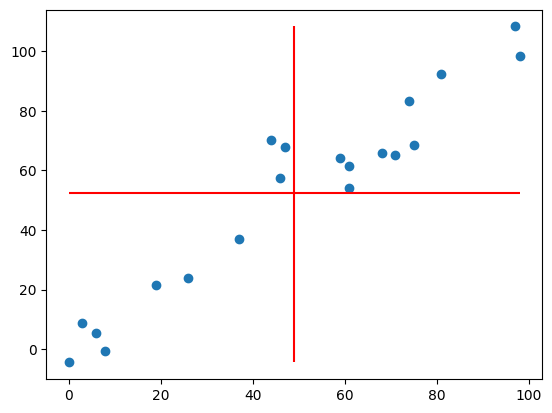

In [15]:
x = np.random.randint(low=0 , high=100, size=20)
print(x)
print()
y = x + np.random.normal(3,10,len(x))
print(y)
plt.vlines(x.mean(), y.min(),y.max(), color = 'r')
plt.hlines(y.mean(), x.min(),x.max(), color = 'r')

plt.scatter(x,y)

* Since we see the points to be in 2 nd and 4th quadrant we can confirm that the points have +ve corellation (Corr > 0)
* But they arent falling on the same line so corr is positive and lies between (0 , 1) 

In [17]:
np.corrcoef(x,y) 
#[ corr(x,x) corr(x,y)
# corr(y,x) corr(y,y) ]

array([[1.        , 0.96167539],
       [0.96167539, 1.        ]])

In [18]:
np.corrcoef(x,y)[0,1]

0.9616753899464555

# Perfect linear

[15.         16.28205128 17.56410256 18.84615385 20.12820513 21.41025641
 22.69230769 23.97435897 25.25641026 26.53846154 27.82051282 29.1025641
 30.38461538 31.66666667 32.94871795 34.23076923 35.51282051 36.79487179
 38.07692308 39.35897436 40.64102564 41.92307692 43.20512821 44.48717949
 45.76923077 47.05128205 48.33333333 49.61538462 50.8974359  52.17948718
 53.46153846 54.74358974 56.02564103 57.30769231 58.58974359 59.87179487
 61.15384615 62.43589744 63.71794872 65.        ]


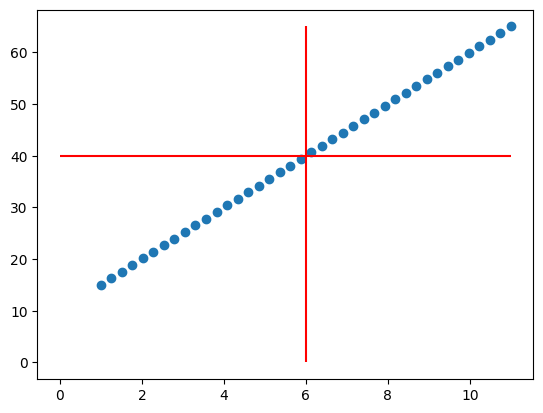

In [28]:
x = np.linspace(1,11,40)

y = 5*x + 10

print(y)
plt.vlines(x.mean(), 0,y.max(), color = 'r')
plt.hlines(y.mean(), 0,x.max(), color = 'r')
plt.scatter(x,y)

As you can see the points are falling exactly on a straight line

# Salary vs years of exp

In [32]:
data = [(1.0, 4), (4.0, 5), (6.0, 7), (9.0, 9), (11.0, 12), (12.0, 15),
        (13.0, 17), (14.0, 18), (15.0, 28), (15.5, 32)]

In [34]:
df = pd.DataFrame(data)
df.columns = ["x", "y"]
df

,x,y
0,1.0,4
1,4.0,5
2,6.0,7
3,9.0,9
4,11.0,12
5,12.0,15
6,13.0,17
7,14.0,18
8,15.0,28
9,15.5,32


In [36]:
print(df.x.mean())
print(df.y.mean())

10.05
14.7


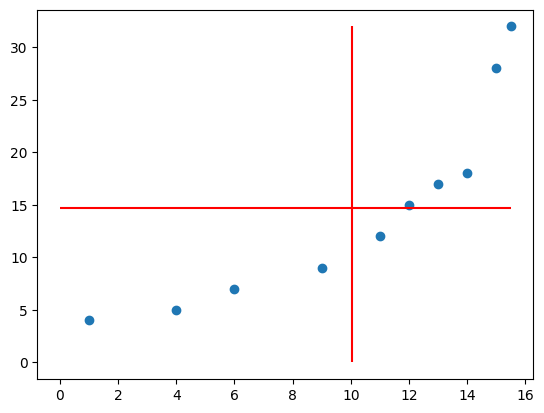

In [37]:
plt.vlines(df.x.mean(), 0, df.y.max(), color = "r")
plt.hlines(df.y.mean(), 0, df.x.max(), color = "r")
plt.scatter(df.x, df.y)
plt.show()

In [38]:
np.corrcoef(df.x, df.y)[0,1]

0.8850072528845457

## pearson : strength of linear relationship 
## spearman : strength of motonic relationship

In [39]:
## Spearman
df.columns = ["years", "salary"]
df

,years,salary
0,1.0,4
1,4.0,5
2,6.0,7
3,9.0,9
4,11.0,12
5,12.0,15
6,13.0,17
7,14.0,18
8,15.0,28
9,15.5,32


In [40]:
df["rank_years"] = pd.Series.rank(df.years)
df["rank_salary"] = pd.Series.rank(df.salary)
df

,years,salary,rank_years,rank_salary
0,1.0,4,1.0,1.0
1,4.0,5,2.0,2.0
2,6.0,7,3.0,3.0
3,9.0,9,4.0,4.0
4,11.0,12,5.0,5.0
5,12.0,15,6.0,6.0
6,13.0,17,7.0,7.0
7,14.0,18,8.0,8.0
8,15.0,28,9.0,9.0
9,15.5,32,10.0,10.0


0.9999999999999999

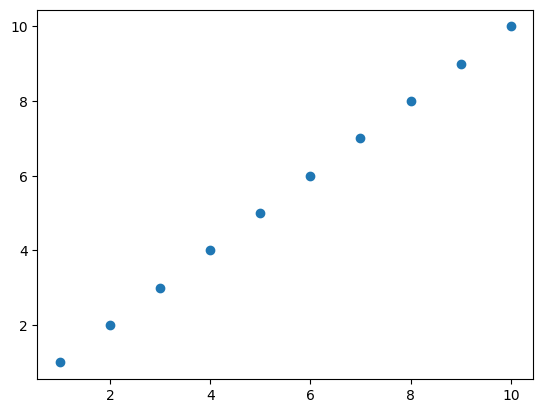

In [42]:
plt.scatter(df.rank_years, df.rank_salary)
np.corrcoef(df.rank_years, df.rank_salary)[0,1]

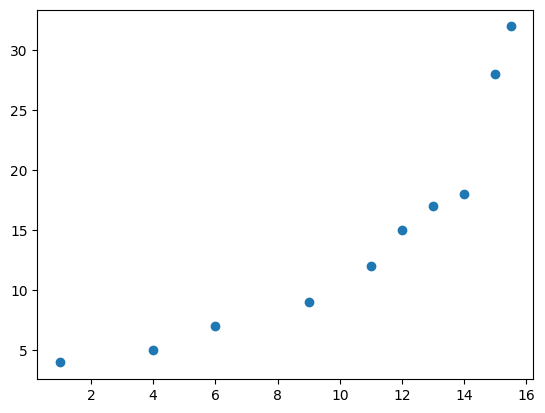

In [43]:

plt.scatter(df.years, df.salary)
plt.show()


In [47]:
spearmanr(df.years, df.salary)[0]

0.9999999999999999

In [52]:
import seaborn as sns
import pandas as pd
anscombe = sns.load_dataset('anscombe')
anscombe["dataset"].value_counts()

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64

In [56]:
np.corrcoef(anscombe[anscombe["dataset"]=="I"]["x"], anscombe[anscombe["dataset"]=="I"]["y"])[0,1]

0.81642051634484

In [55]:
np.corrcoef(anscombe[anscombe["dataset"]=="II"]["x"], anscombe[anscombe["dataset"]=="II"]["y"])[0,1]

0.8162365060002428

In [60]:
wt_before=[85, 74, 63.5, 69.4, 71.6, 65,90,78]

wt_after=[82, 71, 64, 65.2, 67.8, 64.7,95,77]
np.corrcoef(wt_before, wt_after)


array([[1.       , 0.9657585],
       [0.9657585, 1.       ]])